# Gradient Boosting
In the following, four gradient boosting models are set up, which are based on two different data sets. The first data set was calculated based on the PHQ 9 and a cut-off value of 8. The second data set is based on the PHQ SUM and a cut-off value of 21. In the first step, both models were run with all variables contained in the data sets. In the second step, a feature extraction was performed to reduce multicorrenality between the individual features. Final conclusion and comparison in the file conclusion

load all necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectFromModel
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

Load the datasets

In [ ]:
df_16_100=pd.read_csv('/content/drive/MyDrive/Daten ML/Threshold_21_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv', keep_default_na=True)

df_16_100.columns = [s.strip().replace(' ', '_') for s in df_16_100.columns]

df_16_100=df_16_100.dropna(axis=1)

df_16_50_1=df_16_100

df_8_100=pd.read_csv('/content/drive/MyDrive/Daten ML/Threshold_8_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv', keep_default_na=True)

df_8_100.columns = [s.strip().replace(' ', '_') for s in df_8_100.columns]

df_8_100=df_8_100.dropna(axis=1)

df_8_50_1=df_8_100



#Dataset 1: TH: 21 and PHQ Sum without feature extraction



In [ ]:
feature_columns = [col for col in df_16_50_1.columns if 'FEATURE' in col]
X = df_16_50_1[feature_columns]
print(X)
Y=df_16_50_1['Depression']
print(Y)

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)


      FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  FEATURE_5  \
0      5.536784  -0.384406  -0.384638  -0.384663  -0.315343  -0.384643   
1      6.076507  -0.358855  -0.359077  -0.359080  -0.358789  -0.359079   
2      5.250634  -0.442442  -0.442709  -0.442712  -0.279758  -0.442680   
3      6.782467  -0.317195  -0.317315  -0.317362  -0.275703  -0.317371   
4      4.822983  -0.452202  -0.452383  -0.452398  -0.416311  -0.452409   
...         ...        ...        ...        ...        ...        ...   
1115   3.520879  -0.447418  -0.447583  -0.447616  -0.438598  -0.447622   
1116   6.485628  -0.339855  -0.340039  -0.340092  -0.337341  -0.340095   
1117   3.163722  -0.438027  -0.438244  -0.438356  -0.126313  -0.438429   
1118   4.550862  -0.425936  -0.426111  -0.426120  -0.422995  -0.426117   
1119   4.651101  -0.429621  -0.429939  -0.429942  -0.429939  -0.429942   

      FEATURE_6  FEATURE_7  FEATURE_8  FEATURE_9  ...  FEATURE_46  FEATURE_47  \
0     -0.384643  -0.384663  -0

Hyperparameter Tuning for the first Dataset using the range function in the parameter distribution for more different parameter constellations

In [ ]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
GBC=GradientBoostingClassifier()

param_dist = {
    'n_estimators': range(50, 2000, 250),
    'max_depth': range(2, 30, 5),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': np.arange(0.05, 0.8, 0.1)}

rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)


{'subsample': 0.6500000000000001, 'n_estimators': 550, 'max_depth': 17, 'learning_rate': 0.051000000000000004}
0.8578077857484226


training the model and calculating the confusion matrix with the evaluation matrics

Presicion_score 0.94
 Accuracy: 0.9226190476190477
precision: 0.94
recall: 0.6714285714285714
f1: 0.7833333333333332


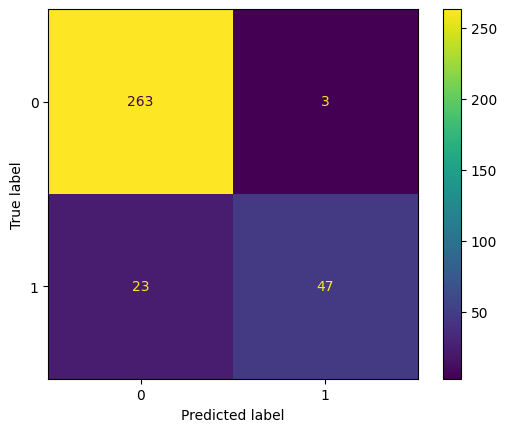

In [ ]:
GBC2=GradientBoostingClassifier(subsample= 0.65, n_estimators=550, max_depth=17, learning_rate=0.051)
pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(f'Presicion_score {Presicion_score}')
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()


TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(f' Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

Calculating the AUC Curve

AUC-Wert: 0.8624597207303973


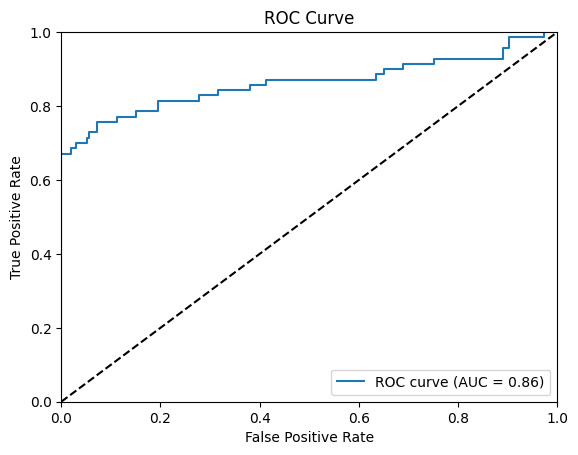

In [ ]:
y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#Dataset 2: TH: 8 and PHQ 9 without feature extraction


best parameter {'subsample': 0.25000000000000006, 'n_estimators': 550, 'max_depth': 17, 'learning_rate': 0.001}
best score 0.9213215296764762
1.0
 Accuracy: 0.8645833333333334
precision: 1.0
recall: 0.4090909090909091
f1: 0.5806451612903226
AUC-Wert: 0.8687039312039312


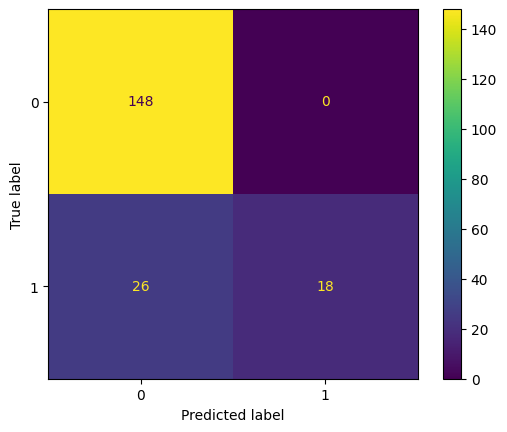

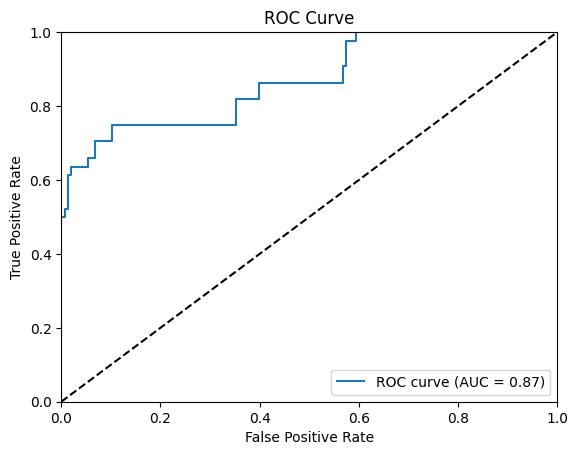

In [ ]:
#define Crossvalidation with 10 Folds and shuffle on

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)


#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

GBC=GradientBoostingClassifier()

#define parameter distribution for the grid search
param_dist = {
    'n_estimators': range(50, 2000, 250),
    'max_depth': range(2, 30, 5),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': np.arange(0.05, 0.8, 0.1)}


#Search for the best parameter with the scoring category roc_auc
rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(f'best parameter {best_parm}')
print(f'best score {best_score}')

#define the Model with the best parameter
GBC2=GradientBoostingClassifier(**best_parm)
#train the model
GBC2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
#Calculating the confusion Matrix
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(f' Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

# calculate ROC-Curve
y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Generell Code for the feature Extraction

In [ ]:
#for better understanding I added the code from /Depression_Level_Classifier/feature_extraction.py instead of just calling it.

def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS

    Filter features based on correlation threshold and visualize the correlation matrices.

    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach. You may choose it
    depending on the context.

    ************************************************************************

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.

    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    # print lists of selected/excluded features
    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

#Dataset 1 with feature extraction

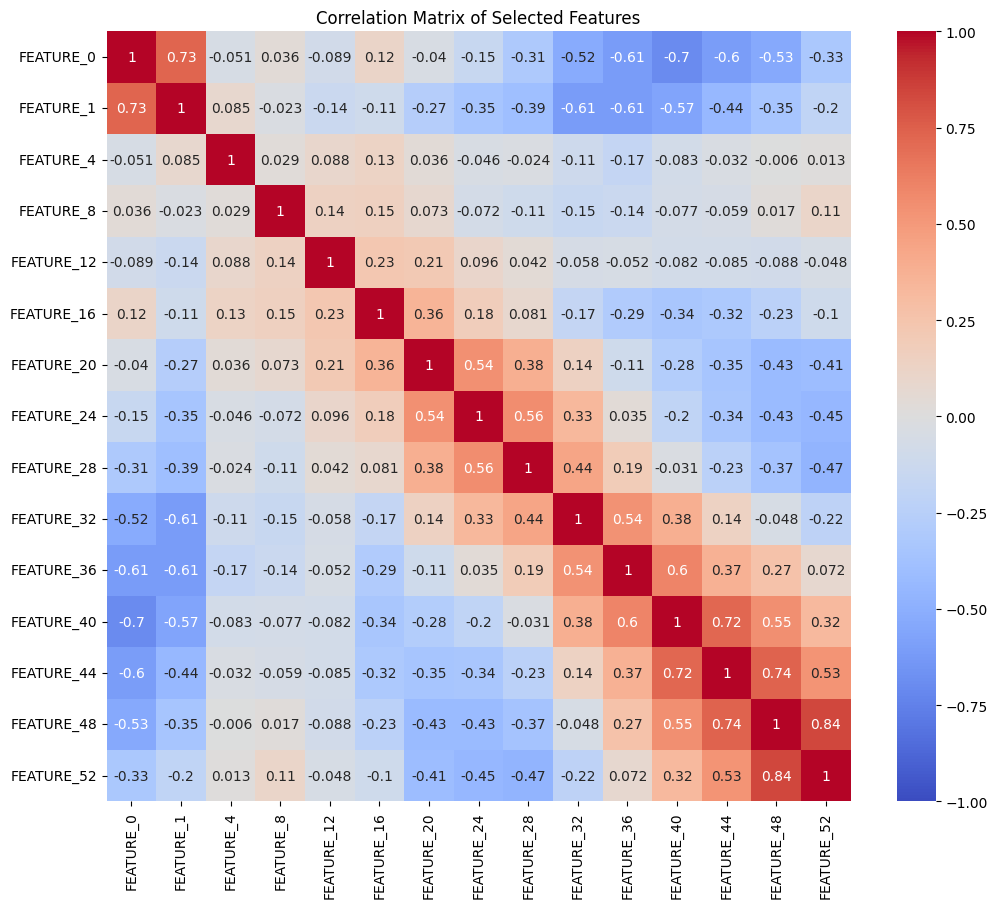

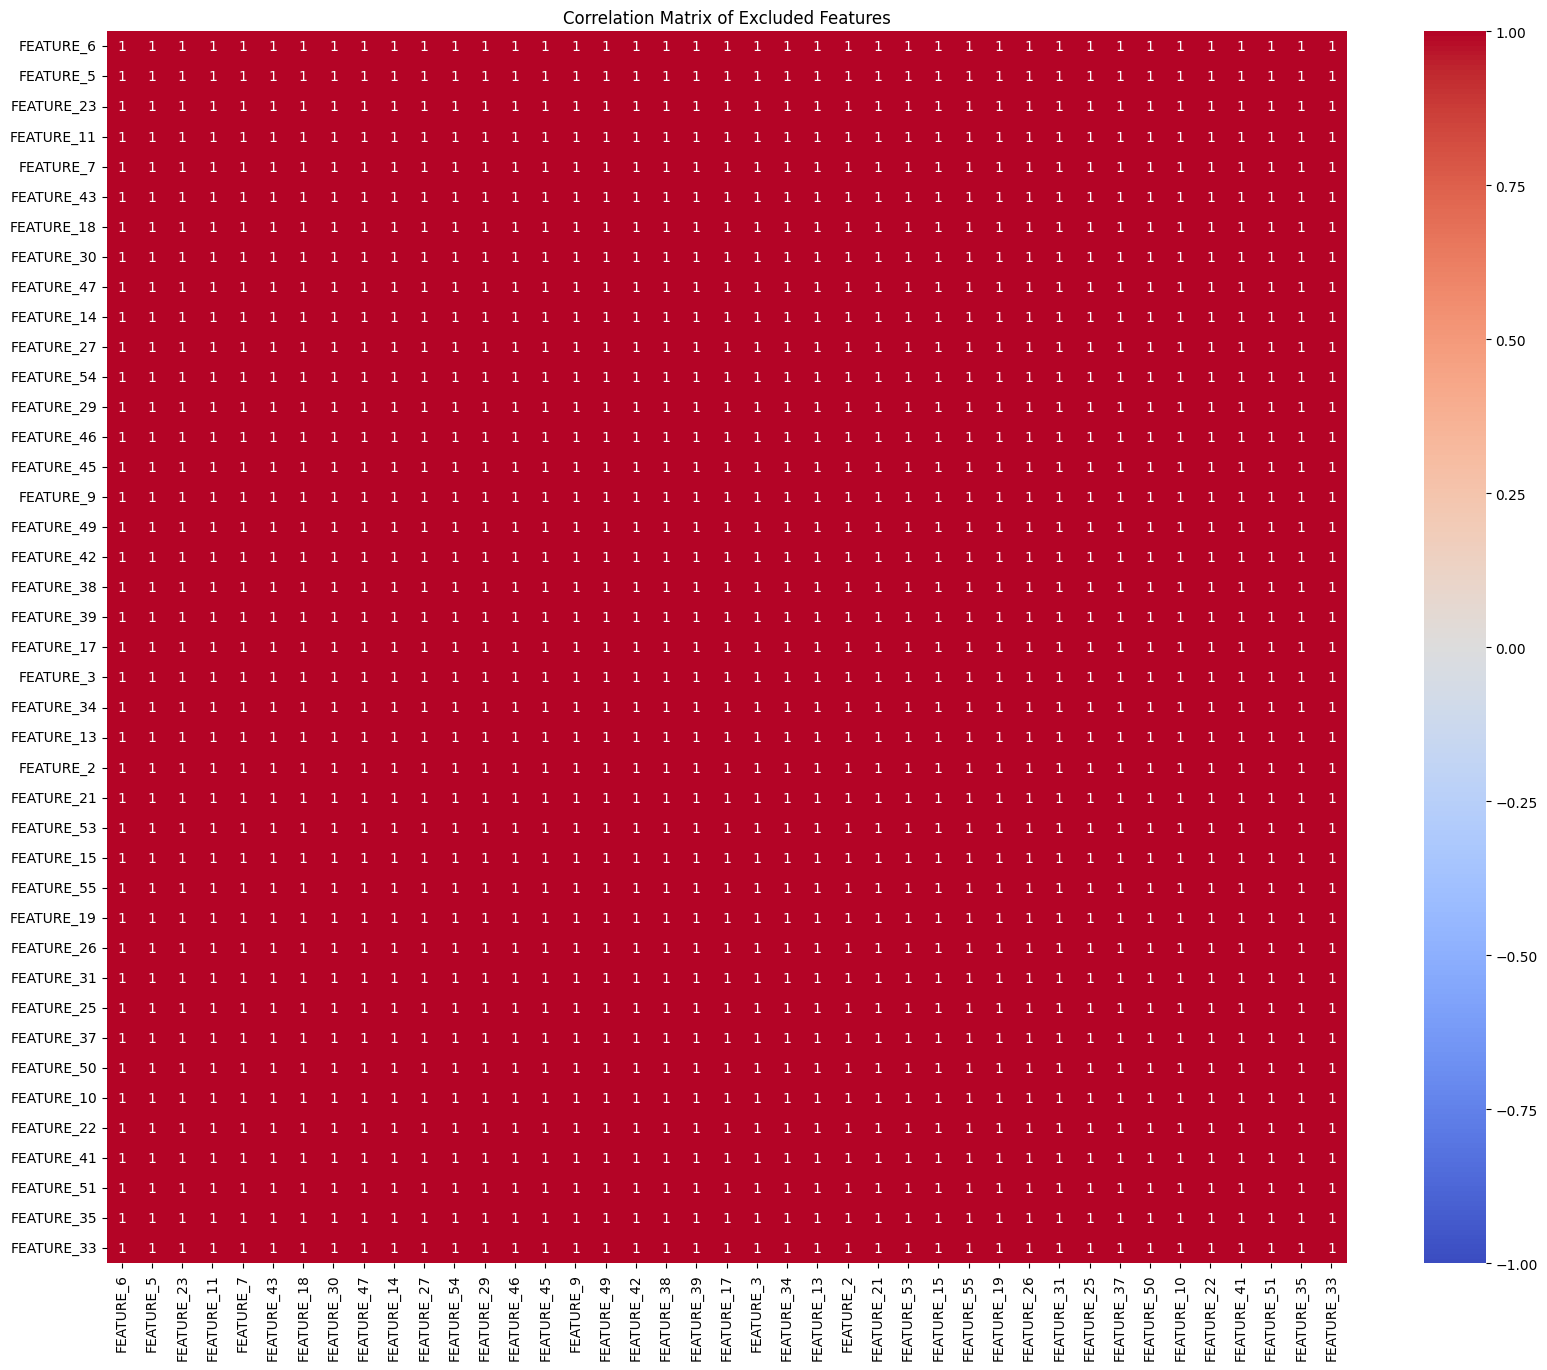

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_6', 'FEATURE_5', 'FEATURE_23', 'FEATURE_11', 'FEATURE_7', 'FEATURE_43', 'FEATURE_18', 'FEATURE_30', 'FEATURE_47', 'FEATURE_14', 'FEATURE_27', 'FEATURE_54', 'FEATURE_29', 'FEATURE_46', 'FEATURE_45', 'FEATURE_9', 'FEATURE_49', 'FEATURE_42', 'FEATURE_38', 'FEATURE_39', 'FEATURE_17', 'FEATURE_3', 'FEATURE_34', 'FEATURE_13', 'FEATURE_2', 'FEATURE_21', 'FEATURE_53', 'FEATURE_15', 'FEATURE_55', 'FEATURE_19', 'FEATURE_26', 'FEATURE_31', 'FEATURE_25', 'FEATURE_37', 'FEATURE_50', 'FEATURE_10', 'FEATURE_22', 'FEATURE_41', 'FEATURE_51', 'FEATURE_35', 'FEATURE_33']


In [ ]:
feature_columns = [col for col in df_16_50_1.columns if 'FEATURE' in col]
X = df_16_50_1[feature_columns]
Y=df_16_50_1['Depression']
extractor(X)
X = X[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]

best parameter {'subsample': 0.6500000000000001, 'n_estimators': 300, 'max_depth': 22, 'learning_rate': 0.001}
best score 0.8523970637185567


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-10-d1dd592e777a>:43: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


0.0
 Accuracy: 0.7916666666666666
precision: nan
recall: 0.0
f1: nan
AUC-Wert: 0.8872717508055855


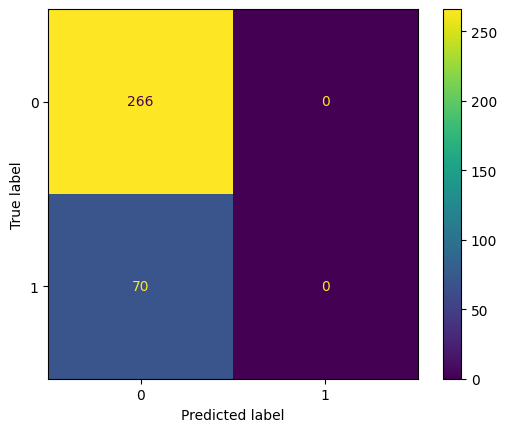

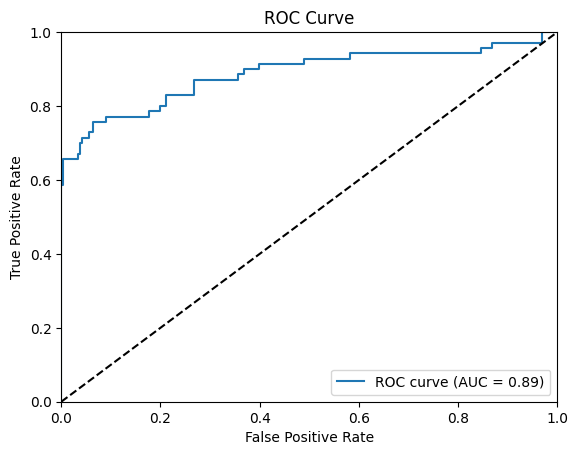

In [ ]:
#define Crossvalidation with 10 Folds and shuffle on

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)


#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

GBC=GradientBoostingClassifier()

#define parameter distribution for the grid search
param_dist = {
    'n_estimators': range(50, 2000, 250),
    'max_depth': range(2, 30, 5),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': np.arange(0.05, 0.8, 0.1)}


#Search for the best parameter with the scoring category roc_auc
rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(f'best parameter {best_parm}')
print(f'best score {best_score}')

#define the Model with the best parameter
GBC2=GradientBoostingClassifier(**best_parm)
#train the model
GBC2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
#Calculating the confusion Matrix
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(f' Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

# calculate ROC-Curve
y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt

# calculate ROC-Curve
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Dataset 2 with feature extraction

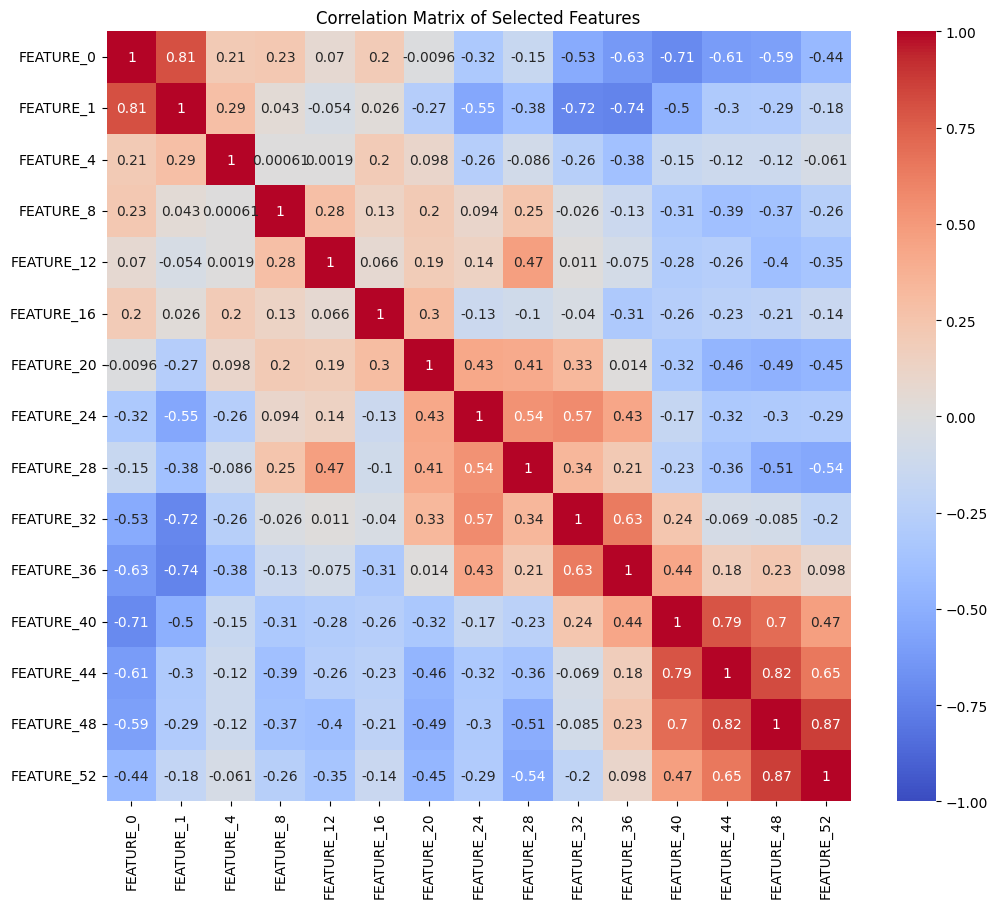

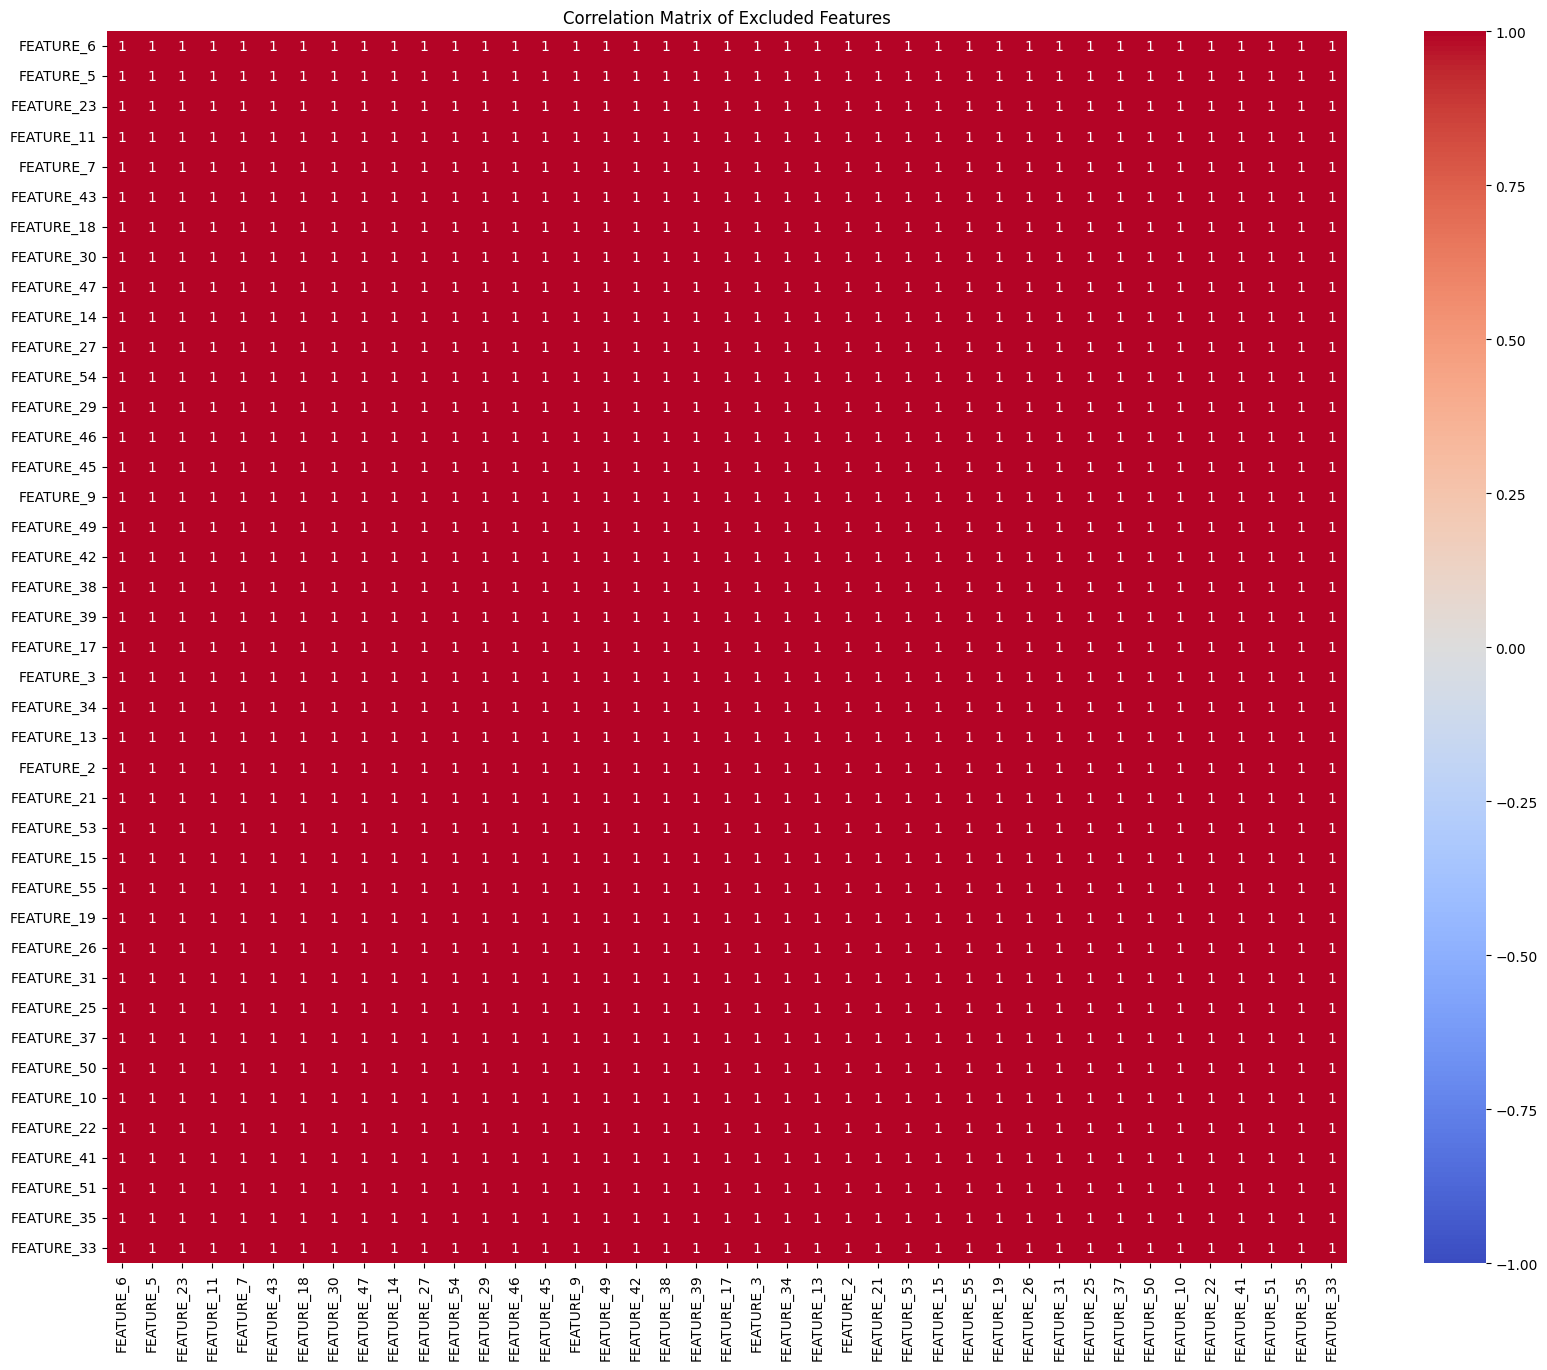

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_6', 'FEATURE_5', 'FEATURE_23', 'FEATURE_11', 'FEATURE_7', 'FEATURE_43', 'FEATURE_18', 'FEATURE_30', 'FEATURE_47', 'FEATURE_14', 'FEATURE_27', 'FEATURE_54', 'FEATURE_29', 'FEATURE_46', 'FEATURE_45', 'FEATURE_9', 'FEATURE_49', 'FEATURE_42', 'FEATURE_38', 'FEATURE_39', 'FEATURE_17', 'FEATURE_3', 'FEATURE_34', 'FEATURE_13', 'FEATURE_2', 'FEATURE_21', 'FEATURE_53', 'FEATURE_15', 'FEATURE_55', 'FEATURE_19', 'FEATURE_26', 'FEATURE_31', 'FEATURE_25', 'FEATURE_37', 'FEATURE_50', 'FEATURE_10', 'FEATURE_22', 'FEATURE_41', 'FEATURE_51', 'FEATURE_35', 'FEATURE_33']


In [ ]:
feature_columns = [col for col in df_8_50_1.columns if 'FEATURE' in col]
X = df_8_50_1[feature_columns]
Y=df_8_50_1['Depression']
extractor(X)
X = X[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]

best parameter {'subsample': 0.5500000000000002, 'n_estimators': 1550, 'max_depth': 12, 'learning_rate': 0.001}
best score 0.9380757869142835
0.967741935483871
 Accuracy: 0.921875
precision: 0.967741935483871
recall: 0.6818181818181818
f1: 0.8
AUC-Wert: 0.8897420147420148


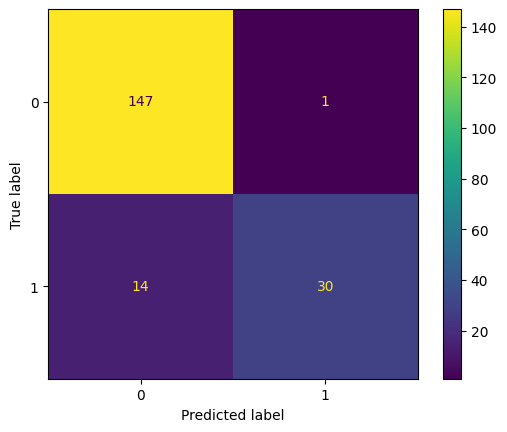

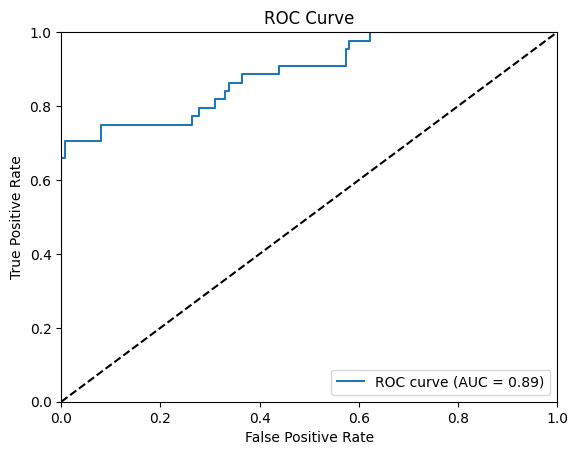

In [ ]:
#define Crossvalidation with 10 Folds and shuffle on

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)


#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

GBC=GradientBoostingClassifier()

#define parameter distribution for the grid search
param_dist = {
    'n_estimators': range(50, 2000, 250),
    'max_depth': range(2, 30, 5),
    'learning_rate': np.arange(0.001, 0.1, 0.05),
    'subsample': np.arange(0.05, 0.8, 0.1)}


#Search for the best parameter with the scoring category roc_auc
rand_search = RandomizedSearchCV(GBC,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=crossvalidation,
                                 scoring='roc_auc')


hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(f'best parameter {best_parm}')
print(f'best score {best_score}')

#define the Model with the best parameter
GBC2=GradientBoostingClassifier(**best_parm)
#train the model
GBC2.fit(train_X, train_Y)

#Make predictions for Y based on the test data of X
pred_Y = GBC2.predict(test_X)
Presicion_score=precision_score(test_Y, pred_Y)
print(Presicion_score)
#Calculating the confusion Matrix
cm=confusion_matrix(test_Y, pred_Y)

ConfusionMatrixDisplay(cm).plot()

#Calculating the evaluation metrics
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print(f' Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

# calculate ROC-Curve
y_pred_proba = GBC2.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

import matplotlib.pyplot as plt

# calculate ROC-Curve
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# draw ROC-Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()